In [1]:
# En el encabezado del script agregamos la ruta donde se encuentra el
# archivo map_plots.py que contienen las funciones para generar las figuras

import sys
sys.path.append('./..')
from map_plots import map_pcolor, map_quiver, add_quiverPlot

import datetime as dt

# Para este ejemplo usamos la biblioteca xarray, que permite leer
# datos de archivos netcdf, y reconoce detalles como variables 
# de coordenadas para realizar analisis con un nivel de abstracción
# mas alto.
# Si los datos son netCDF + CF compliant, xarray detecta variables
# de coordenadas y atributos especiales.
# http://xarray.pydata.org/en/stable/

import xarray as xr 

In [2]:
# Cargar Datos usando xarray
ncSrc = '../../gom-cicese-roms-agrif-phy-5km/data/CLimDiariaMLD.nc'

dst = xr.open_dataset(ncSrc)
dstLon = dst.variables['LON'].values
dstLat = dst.variables['LAT'].values

dst['MIXED_LAYER']

/Users/hmedrano/anaconda3/envs/cartoplot/lib/python3.7/site-packages/xarray/coding/times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/hmedrano/anaconda3/envs/cartoplot/lib/python3.7/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.DataArray 'MIXED_LAYER' (TIME: 365, LAT: 218, LON: 318)>
[25303260 values with dtype=float64]
Coordinates:
  * LON      (LON) float64 261.8 261.9 261.9 262.0 ... 280.6 280.7 280.8 280.8
  * LAT      (LAT) float64 17.9 17.96 18.02 18.08 ... 30.74 30.8 30.86 30.92
  * TIME     (TIME) object 0001-01-01 12:00:00 ... 0001-12-31 12:00:00
Attributes:
    long_name:      HBL[GT=TDAY@MOD]
    history:        From ClimDiaria20HBL
    standard_name:  ocean_mixed_layer_thickness
    units:          m

In [3]:
# Creamos una variable tiempo sintetica, pues los valores de tiempo 
# con los que viene este archivo netcdf no son valores validos, y es la 
# causa de que falle el calculo de la media
sinteticTime = [ dt.datetime(1970,1,1,12) + dt.timedelta(days=day) for day in range(0,365) ]

# Reemplazamos la variable de coordenadas de tiempo, con la lista que acabamos de crear.
dstMLD = dst['MIXED_LAYER'].assign_coords(TIME=sinteticTime)

dstMLD

<xarray.DataArray 'MIXED_LAYER' (TIME: 365, LAT: 218, LON: 318)>
[25303260 values with dtype=float64]
Coordinates:
  * LON      (LON) float64 261.8 261.9 261.9 262.0 ... 280.6 280.7 280.8 280.8
  * LAT      (LAT) float64 17.9 17.96 18.02 18.08 ... 30.74 30.8 30.86 30.92
  * TIME     (TIME) datetime64[ns] 1970-01-01T12:00:00 ... 1970-12-31T12:00:00
Attributes:
    long_name:      HBL[GT=TDAY@MOD]
    history:        From ClimDiaria20HBL
    standard_name:  ocean_mixed_layer_thickness
    units:          m

In [4]:
# Calculo de media anual
mldMean = dstMLD.resample(TIME='1Y').mean()
mldMean

<xarray.DataArray 'MIXED_LAYER' (TIME: 1, LAT: 218, LON: 318)>
array([[[        nan,         nan,         nan, ..., 54.03431027,
         54.02813922, 53.84539656],
        [        nan,         nan,         nan, ..., 53.22372239,
         53.15503221, 53.09976162],
        [        nan,         nan,         nan, ..., 52.51699967,
         52.42570999, 52.33879348],
        ...,
        [        nan,         nan,         nan, ..., 57.27730882,
         57.72607134, 57.87180563],
        [        nan,         nan,         nan, ..., 57.18463993,
         57.8995384 , 58.29855524],
        [        nan,         nan,         nan, ..., 52.77316532,
         54.1754883 , 54.89338719]]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 1970-12-31
  * LON      (LON) float64 261.8 261.9 261.9 262.0 ... 280.6 280.7 280.8 280.8
  * LAT      (LAT) float64 17.9 17.96 18.02 18.08 ... 30.74 30.8 30.86 30.92

/Users/hmedrano/anaconda3/envs/cartoplot/lib/python3.7/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


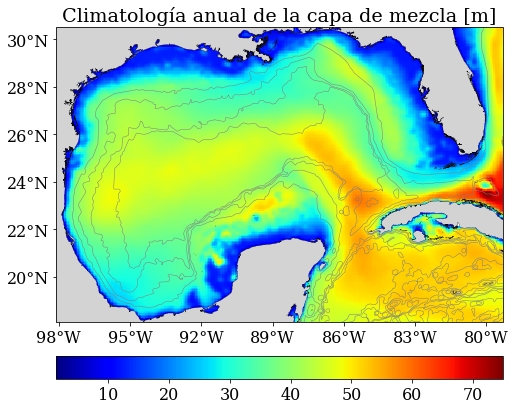

In [5]:
# Graficado
ax, figure = map_pcolor(dstLon, dstLat, mldMean[0,:],
                        title='Climatología anual de la capa de mezcla [m]',
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },
                        extent=[-98.1, -79.3, 18.1, 30.5],
                        cmap='jet')